<a href="https://colab.research.google.com/github/CristinaMarsh/Data/blob/main/Reanalysis/%E5%9F%BA%E4%BA%8EAWS_S3%E5%BC%80%E6%94%BE%E6%95%B0%E6%8D%AE%E9%9B%86%E7%9A%84ERA5%E6%95%B0%E6%8D%AE%E5%BF%AB%E9%80%9F%E8%8E%B7%E5%8F%96%E4%B8%8E%E5%88%86%E6%9E%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.heywhale.com/mw/project/62bee7e9913a54a66026559f

In [1]:
!python -m pip install boto3 xarray netcdf4 -i https://pypi.org/simple/

Looking in indexes: https://pypi.org/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.7/135.7 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 53.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 54.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 26.8 MB/s eta 0:00:00


补充说明
关于ERA5：ERA5 是最新的综合 ECMWF 再分析，已取代 ERA-Interim。它基于 2016 年投入使用的 ECMWF IFS (Cy41r2) 版本。ERA5 提供自 1950 年以来全球大气、地表和海浪的每小时估计值，并以 5 天的延迟每天更新。其状态估计基于水平分辨率为 31 公里的高分辨率 (HRES) 组件，垂直跨越从表面到 0.01 hPa 的 137 个级别。这些不确定性的信息由 10 个成员的数据同化集合 (EDA) 以水平分辨率的一半提供。HRES 和 EDA ERA5 数据同化都使用利用 EDA 输出的背景误差估计。ERA5的陆地成分，和ERA5-Land一样，基于CHTESSEL模型，并且分辨率为 31 公里而不是 9 公里。ERA5 使用了对海面温度和海冰浓度的新分析、来自 CMIP5 规范的辐射强迫变化以及各种新的和再处理的观测数据记录。

In [2]:
import boto3
import botocore
import datetime

In [3]:
# 定义了需要连接的数据
# 下方的变量可以在https://aws.amazon.com/marketplace/pp/prodview-yhz3mavy6s7go?sr=0-1&ref_=beagle&applicationId=AWSMPContessa 查询到
era5_bucket = 'era5-pds'

# 设置免登录下载数据，免费数据的重要特征
# No AWS keys required
client = boto3.client('s3', config=botocore.client.Config(signature_version=botocore.UNSIGNED))

# 批量查询可用的数据源
keys = [] #存储查询到的结果
date = datetime.date(2018,1,1) # update to desired date #定义要查询的时间
prefix = date.strftime('%Y/%m/') #格式化要查询的时间
response = client.list_objects_v2(Bucket=era5_bucket, Prefix=prefix) #尝试建立连接
response_meta = response.get('ResponseMetadata') #建立连接以后查询数据
if response_meta.get('HTTPStatusCode') == 200: #建立成功
    contents = response.get('Contents') #抓取内容
    if contents == None: #如果没有返回
        print("No objects are available for %s" % date.strftime('%B, %Y')) #打印没有数据的消息
    else: #如果有
        for obj in contents: #遍历查询到的数据
            keys.append(obj.get('Key')) #在列表里面添加
        print("There are %s objects available for %s\n--" % (len(keys), date.strftime('%B, %Y'))) #打印查询结果
        for k in keys:
            print(k)
else:
    print("There was an error with your request.")

There are 20 objects available for January, 2018
--
2018/01/data/air_pressure_at_mean_sea_level.nc
2018/01/data/air_temperature_at_2_metres.nc
2018/01/data/air_temperature_at_2_metres_1hour_Maximum.nc
2018/01/data/air_temperature_at_2_metres_1hour_Minimum.nc
2018/01/data/dew_point_temperature_at_2_metres.nc
2018/01/data/eastward_wind_at_100_metres.nc
2018/01/data/eastward_wind_at_10_metres.nc
2018/01/data/integral_wrt_time_of_surface_direct_downwelling_shortwave_flux_in_air_1hour_Accumulation.nc
2018/01/data/lwe_thickness_of_surface_snow_amount.nc
2018/01/data/northward_wind_at_100_metres.nc
2018/01/data/northward_wind_at_10_metres.nc
2018/01/data/precipitation_amount_1hour_Accumulation.nc
2018/01/data/sea_surface_temperature.nc
2018/01/data/sea_surface_wave_from_direction.nc
2018/01/data/sea_surface_wave_mean_period.nc
2018/01/data/sea_surface_wind_wave_from_direction.nc
2018/01/data/significant_height_of_wind_and_swell_waves.nc
2018/01/data/snow_density.nc
2018/01/data/surface_air_pr

In [4]:
#下载需要的数据，使用WGET软件，感叹号是使用命令行,在项目文件里已经挂载，可以不下
!wget https://era5-pds.s3.amazonaws.com/2018/11/data/air_temperature_at_2_metres.nc

--2023-07-17 14:10:42--  https://era5-pds.s3.amazonaws.com/2018/11/data/air_temperature_at_2_metres.nc
Resolving era5-pds.s3.amazonaws.com (era5-pds.s3.amazonaws.com)... 52.217.75.172, 52.217.201.153, 3.5.25.196, ...
Connecting to era5-pds.s3.amazonaws.com (era5-pds.s3.amazonaws.com)|52.217.75.172|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 467430542 (446M) [binary/octet-stream]
Saving to: ‘air_temperature_at_2_metres.nc’

air_temperature_at_ 100%[===================>] 445.78M  37.8MB/s    in 12s     

2023-07-17 14:10:55 (35.7 MB/s) - ‘air_temperature_at_2_metres.nc’ saved [467430542/467430542]



# 【空间数据绘制分析】
## 加载世界数据，2m气温

In [5]:
import xarray as xr #导入包

#加载数据
sea_surface_temperature=xr.open_mfdataset('/content/air_temperature_at_2_metres.nc')
#查看数据


In [6]:
sea_surface_temperature.data_vars

Data variables:
    air_temperature_at_2_metres  (time0, lat, lon) float32 dask.array<chunksize=(720, 721, 1440), meta=np.ndarray>

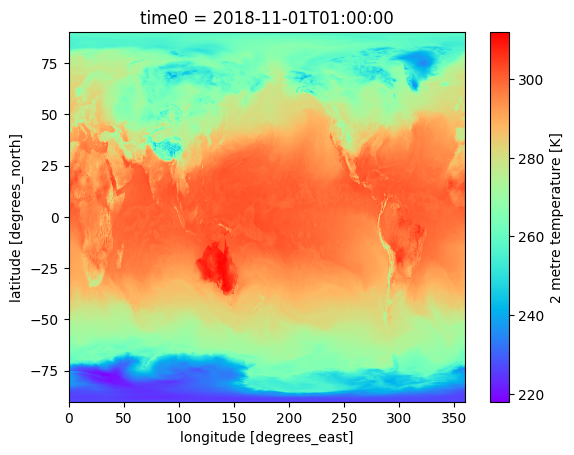

In [7]:
sea_surface_temperature.isel(time0=1).air_temperature_at_2_metres.plot(cmap='rainbow')

In [8]:
#绘制澳大利亚的月平均气温分布

min_lon = 112 #最小经度
min_lat = -43.5 #最小纬度
max_lon = 154 #最大经度
max_lat = -10 #最大纬度

#裁剪经度
mask_lon = (sea_surface_temperature.lon >= min_lon) & (sea_surface_temperature.lon <= max_lon)
#裁剪纬度
mask_lat = (sea_surface_temperature.lat >= min_lat) & (sea_surface_temperature.lat <= max_lat)

#提取经纬度裁剪的数据
sea_surface_temperature_aus = sea_surface_temperature.where(mask_lon & mask_lat, drop=True)
#查看经纬度裁剪后的数据
sea_surface_temperature_aus

<xarray.Dataset>
Dimensions:                      (time0: 720, lat: 135, lon: 169)
Coordinates:
  * lon                          (lon) float32 112.0 112.2 112.5 ... 153.8 154.0
  * lat                          (lat) float32 -10.0 -10.25 ... -43.25 -43.5
  * time0                        (time0) datetime64[ns] 2018-11-01 ... 2018-1...
Data variables:
    air_temperature_at_2_metres  (time0, lat, lon) float32 dask.array<chunksize=(720, 135, 169), meta=np.ndarray>
Attributes:
    source:       Reanalysis
    institution:  ECMWF
    tilte:        ERA5 forecasts

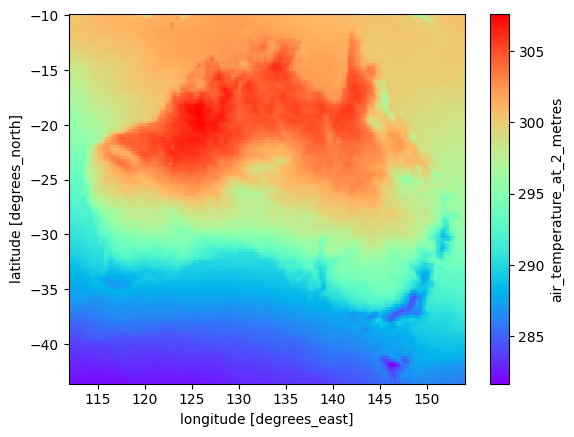

In [9]:
#绘制裁剪后的数据，注意东南部和西南部的对比
sea_surface_temperature_aus.mean('time0').air_temperature_at_2_metres.plot(cmap='rainbow')

# 【时间序列绘制分析】

用nearest查看最近的
## 上海佘山温度时间序列提取

In [11]:
#查询上海佘山的气温，经纬度是佘山的
sea_surface_temperature_Sheshan=sea_surface_temperature.sel(lon=121.187,lat=31.10,method='nearest')

#展示查询后的数据
sea_surface_temperature_Sheshan

<xarray.Dataset>
Dimensions:                      (time0: 720)
Coordinates:
    lon                          float32 121.2
    lat                          float32 31.0
  * time0                        (time0) datetime64[ns] 2018-11-01 ... 2018-1...
Data variables:
    air_temperature_at_2_metres  (time0) float32 dask.array<chunksize=(720,), meta=np.ndarray>
Attributes:
    source:       Reanalysis
    institution:  ECMWF
    tilte:        ERA5 forecasts

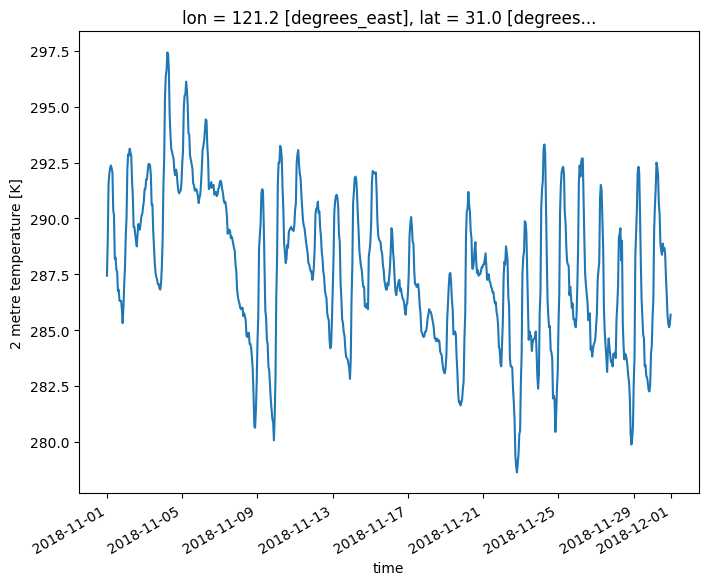

In [12]:
sea_surface_temperature_Sheshan.air_temperature_at_2_metres.plot(figsize=(8,6))

In [19]:
#查询上海佘山的气温，经纬度是佘山的
sea_surface_temperature_Baige=sea_surface_temperature.sel(lon=98.70,lat=31.08,method='nearest')

#展示查询后的数据
sea_surface_temperature_Baige

<xarray.Dataset>
Dimensions:                      (time0: 720)
Coordinates:
    lon                          float32 98.75
    lat                          float32 31.0
  * time0                        (time0) datetime64[ns] 2018-11-01 ... 2018-1...
Data variables:
    air_temperature_at_2_metres  (time0) float32 dask.array<chunksize=(720,), meta=np.ndarray>
Attributes:
    source:       Reanalysis
    institution:  ECMWF
    tilte:        ERA5 forecasts

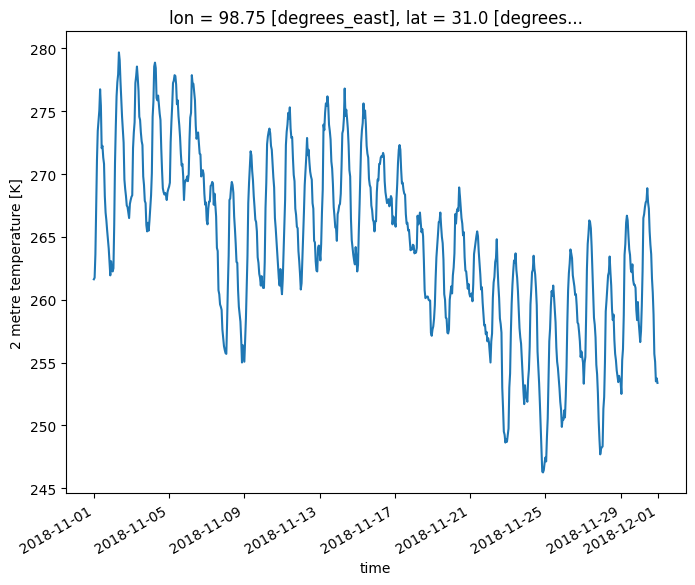

In [20]:
sea_surface_temperature_Baige.air_temperature_at_2_metres.plot(figsize=(8,6))

## 上海徐家汇温度时间序列提取

In [21]:
#查询上海徐家汇的气温，经纬度是徐家汇的
sea_surface_temperature_Xujia=sea_surface_temperature.sel(lon=121.4406,lat=31.1939,method='nearest')
#展示查询后的数据
sea_surface_temperature_Xujia

<xarray.Dataset>
Dimensions:                      (time0: 720)
Coordinates:
    lon                          float32 121.5
    lat                          float32 31.25
  * time0                        (time0) datetime64[ns] 2018-11-01 ... 2018-1...
Data variables:
    air_temperature_at_2_metres  (time0) float32 dask.array<chunksize=(720,), meta=np.ndarray>
Attributes:
    source:       Reanalysis
    institution:  ECMWF
    tilte:        ERA5 forecasts

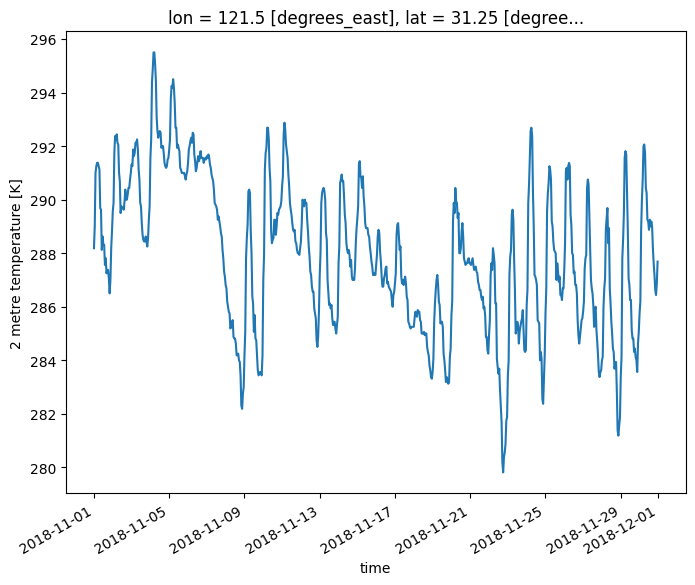

In [22]:
sea_surface_temperature_Xujia.air_temperature_at_2_metres.plot(figsize=(8,6))

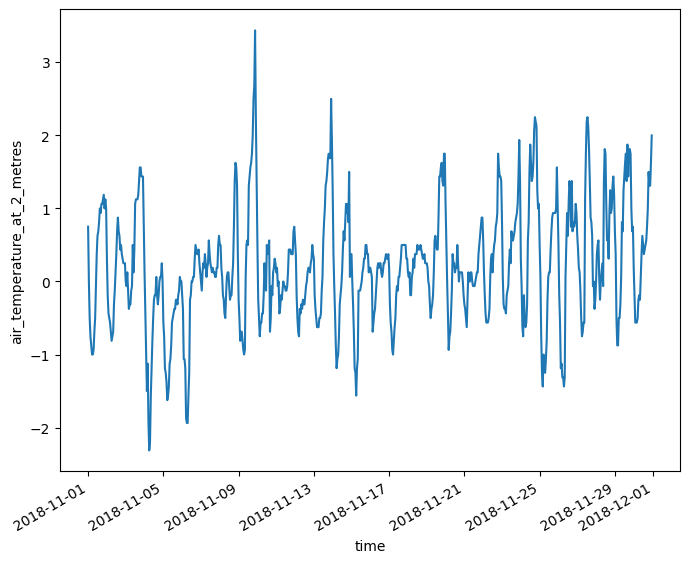

In [23]:
## 绘制上海徐家汇和佘山的月内每日气温差的变化


# 绘制折线图plot
(sea_surface_temperature_Xujia-sea_surface_temperature_Sheshan).air_temperature_at_2_metres.plot(figsize=(8,6))

(array([  6.,  26.,  61., 173., 255., 106.,  62.,  27.,   3.,   1.]),
 array([-2.3125    , -1.73749995, -1.16250002, -0.58749998, -0.0125    ,
         0.5625    ,  1.13750005,  1.71249998,  2.2874999 ,  2.86249995,
         3.4375    ]),
 <BarContainer object of 10 artists>)

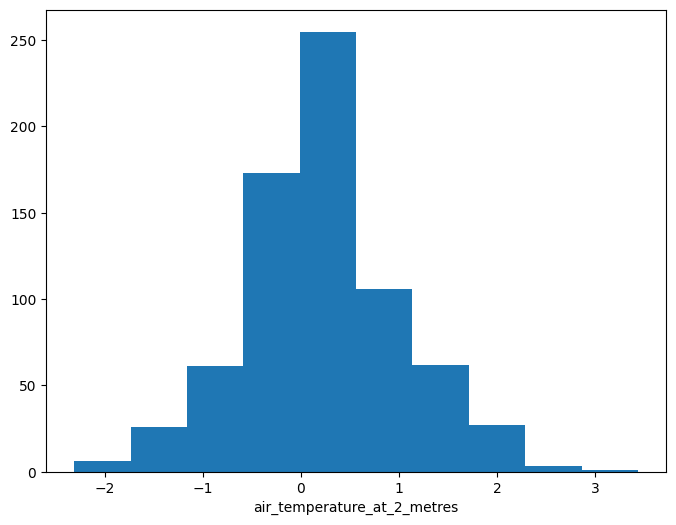

In [24]:
## 绘制上海徐家汇和佘山的月内每日气温差的分布

# 绘制温度差的hist直方图
(sea_surface_temperature_Xujia-sea_surface_temperature_Sheshan).air_temperature_at_2_metres.plot.hist(figsize=(8,6))

<Axes: >

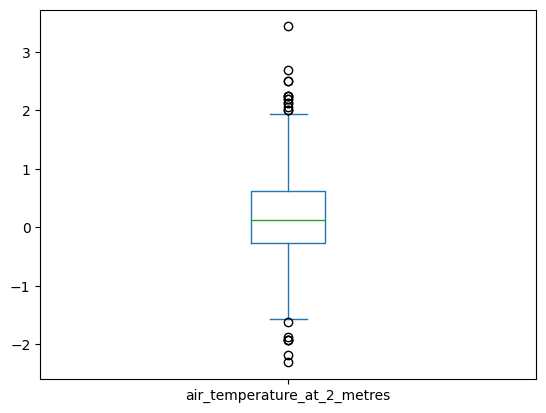

In [25]:
# 绘制温度差的box箱线图图，注意箱线中值
(sea_surface_temperature_Xujia-sea_surface_temperature_Sheshan).air_temperature_at_2_metres.to_series().plot.box()

In [26]:
#生成温差数据表
delta=(sea_surface_temperature_Xujia-sea_surface_temperature_Sheshan).air_temperature_at_2_metres.to_dataframe()
#重置index
delta=delta.reset_index()
delta

,time0,air_temperature_at_2_metres
0,2018-11-01 00:00:00,0.7500
1,2018-11-01 01:00:00,0.0000
2,2018-11-01 02:00:00,-0.5000
3,2018-11-01 03:00:00,-0.7500
4,2018-11-01 04:00:00,-0.8750
...,...,...
715,2018-11-30 19:00:00,1.5000
716,2018-11-30 20:00:00,1.3125
717,2018-11-30 21:00:00,1.3125
718,2018-11-30 22:00:00,1.6250


In [27]:
#添加一列小时数据,可以看出，表格多了一列小时
delta['hour']=delta.time0.dt.hour
delta

,time0,air_temperature_at_2_metres,hour
0,2018-11-01 00:00:00,0.7500,0
1,2018-11-01 01:00:00,0.0000,1
2,2018-11-01 02:00:00,-0.5000,2
3,2018-11-01 03:00:00,-0.7500,3
4,2018-11-01 04:00:00,-0.8750,4
...,...,...,...
715,2018-11-30 19:00:00,1.5000,19
716,2018-11-30 20:00:00,1.3125,20
717,2018-11-30 21:00:00,1.3125,21
718,2018-11-30 22:00:00,1.6250,22


<Axes: title={'center': 'air_temperature_at_2_metres'}, xlabel='[hour]'>

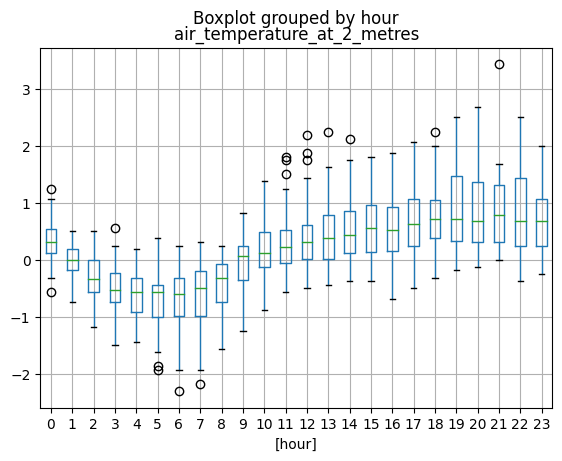

In [28]:
# 绘制温差数据在一日内的分布，注意，时间是UTC
delta.boxplot(column=['air_temperature_at_2_metres'],by=['hour'])

本节分析：①徐家汇与佘山的平均气温接近；②北京时间14时附近，温差负值较大。

# 【纬向切片分析】
气温的地形垂直递减研究，以乞力马扎罗山为例


裁剪乞力马扎罗山附近数据

In [29]:
#定义乞力马扎罗山附近范围
min_lon = 37
min_lat = -3.8
max_lon = 38
max_lat = -2.5

mask_lon = (sea_surface_temperature.lon >= min_lon) & (sea_surface_temperature.lon <= max_lon)
mask_lat = (sea_surface_temperature.lat >= min_lat) & (sea_surface_temperature.lat <= max_lat)

sea_surface_temperature_Kilimanjaro = sea_surface_temperature.where(mask_lon & mask_lat, drop=True)

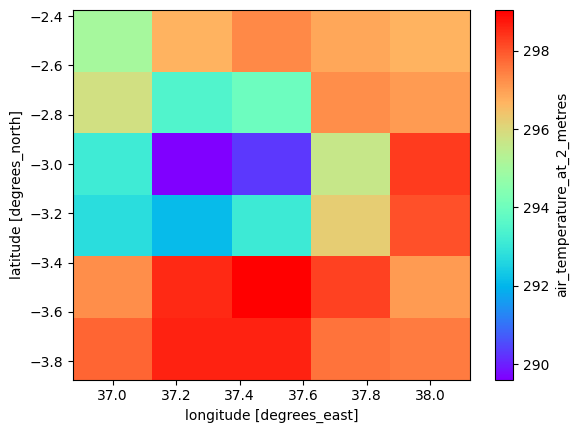

In [30]:
#绘制气温分布，可以发现低值中心
sea_surface_temperature_Kilimanjaro.mean('time0').air_temperature_at_2_metres.plot(cmap='rainbow')

In [31]:
# 使用slice来切片提取数据
sea_surface_temperature_lon=sea_surface_temperature.sel(lon=slice(0,50),lat=slice(-3,-3)).mean('time0').air_temperature_at_2_metres
sea_surface_temperature_lon

<xarray.DataArray 'air_temperature_at_2_metres' (lat: 1, lon: 201)>
dask.array<mean_agg-aggregate, shape=(1, 201), dtype=float32, chunksize=(1, 201), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float32 0.0 0.25 0.5 0.75 1.0 ... 49.0 49.25 49.5 49.75 50.0
  * lat      (lat) float32 -3.0

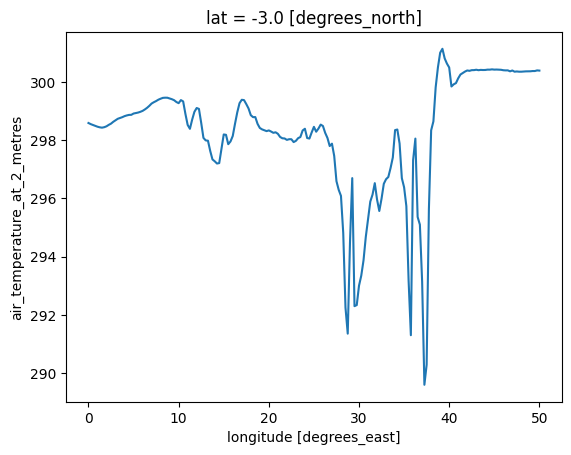

In [32]:
# 绘制纬向气温分布
sea_surface_temperature_lon.plot()

本节总结：①从空间上看，乞力马扎罗山附近温度较低；②从同纬度来看，乞力马扎罗山附近温度较低。

In [33]:
import math

center_lon = 98.70
center_lat = 31.08
radius_degrees = 0.5  # Example radius of 0.5 degrees

# Calculate the extent in longitude
lon_range = radius_degrees / math.cos(math.radians(center_lat))

# Calculate the extent in latitude
lat_range = radius_degrees

# Calculate the minimum and maximum longitude and latitude values
min_lon = center_lon - lon_range
max_lon = center_lon + lon_range
min_lat = center_lat - lat_range
max_lat = center_lat + lat_range


In [34]:
mask_lon = (sea_surface_temperature.lon >= min_lon) & (sea_surface_temperature.lon <= max_lon)
mask_lat = (sea_surface_temperature.lat >= min_lat) & (sea_surface_temperature.lat <= max_lat)

sea_surface_temperature_baige = sea_surface_temperature.where(mask_lon & mask_lat, drop=True)

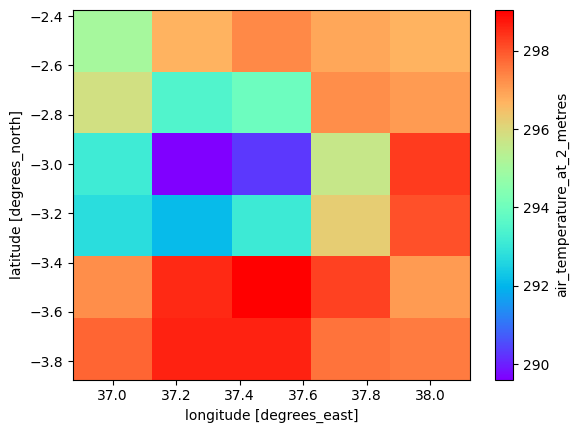

In [36]:
#绘制气温分布，可以发现低值中心
sea_surface_temperature_Kilimanjaro.mean('time0').air_temperature_at_2_metres.plot(cmap='rainbow')